In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
from citipy import citipy

In [23]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
ribeira grande pt
loukhi ru
saint-philippe re
kumluca tr
pouembout nc
port blair in
bethel us
rikitea pf
ushuaia ar
hvide sande dk
tuktoyaktuk ca
kusye-aleksandrovskiy ru
thompson ca
aklavik ca
saryshagan kz
saint anthony ca
atuona pf
kamenskoye ru
luganville vu
hobart au
kazalinsk kz
busselton au
punta arenas cl
vaini to
longyearbyen sj
nikolskoye ru
komsomolskiy ru
rikitea pf
jiaohe cn
barentsburg sj
abha sa
atasu kz
jamestown sh
mar del plata ar
atuona pf
souillac mu
lima pe
qaanaaq gl
ko samui th
upernavik gl
sobolevo ru
stamsund no
hobart au
kingsport us
vaini to
albany au
port alfred za
mar del plata ar
hermanus za
bubaque gw
rikitea pf
punta arenas cl
olafsvik is
dutlwe bw
busselton au
umzimvubu za
arlit ne
busselton au
tuktoyaktuk ca
norman wells ca
sitka us
surany sk
yulara au
tiksi ru
vaini to
puerto ayora ec
labrea br
rikitea pf
san ignacio bo
albany au
tateyama jp
arraial do cabo br
chokurdakh ru
cape town za
luau ao
talnakh ru
iqaluit ca
mataura pf
abu zabad sd
am

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [15]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c9ce23aa34c6c0d9a6303e8f21a3dee


In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

cessing Record 1 of Set 16 | ketchikan
Processing Record 2 of Set 16 | mancio lima
Processing Record 3 of Set 16 | coahuayana
Processing Record 4 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 16 | esperance
Processing Record 6 of Set 16 | salta
Processing Record 7 of Set 16 | latung
Processing Record 8 of Set 16 | tasiilaq
Processing Record 9 of Set 16 | kota bahru
Processing Record 10 of Set 16 | saldanha
Processing Record 11 of Set 16 | sankt florian
Processing Record 12 of Set 16 | kant
Processing Record 13 of Set 16 | mayo
Processing Record 14 of Set 16 | neiafu
Processing Record 15 of Set 16 | prince rupert
Processing Record 16 of Set 16 | castro
Processing Record 17 of Set 16 | warqla
City not found. Skipping...
Processing Record 18 of Set 16 | laguna
Processing Record 19 of Set 16 | chake chake
Processing Record 20 of Set 16 | jacareacanga
Processing Record 21 of Set 16 | omboue
Processing Record 22 of Set 16 | agirish
Processing Record 23 of Se

In [29]:
len(city_data)

554

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.76,88,75,2.30,TO,2021-05-24 19:53:36
1,Ribeira Grande,38.5167,-28.7000,64.80,68,20,14.97,PT,2021-05-24 19:52:50
2,Loukhi,66.0764,33.0381,34.81,91,100,4.70,RU,2021-05-24 19:56:52
3,Saint-Philippe,-21.3585,55.7679,71.19,79,94,15.35,RE,2021-05-24 19:53:07
4,Kumluca,36.3703,30.2869,77.95,35,1,7.70,TR,2021-05-24 19:56:52
5,Pouembout,-21.1333,164.9000,67.62,70,38,8.34,NC,2021-05-24 19:56:53
6,Port Blair,11.6667,92.7500,83.34,82,100,23.31,IN,2021-05-24 19:54:20
7,Bethel,41.3712,-73.4140,70.56,57,95,1.99,US,2021-05-24 19:53:12
8,Rikitea,-23.1203,-134.9692,76.42,82,100,18.92,PF,2021-05-24 19:53:00
9,Ushuaia,-54.8000,-68.3000,33.46,93,75,18.41,AR,2021-05-24 19:52:55


In [31]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [32]:
city_data_df = city_data_df[new_column_order]

In [33]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-05-24 19:53:36,-21.2000,-175.2000,71.76,88,75,2.30
1,Ribeira Grande,PT,2021-05-24 19:52:50,38.5167,-28.7000,64.80,68,20,14.97
2,Loukhi,RU,2021-05-24 19:56:52,66.0764,33.0381,34.81,91,100,4.70
3,Saint-Philippe,RE,2021-05-24 19:53:07,-21.3585,55.7679,71.19,79,94,15.35
4,Kumluca,TR,2021-05-24 19:56:52,36.3703,30.2869,77.95,35,1,7.70
...,...,...,...,...,...,...,...,...,...
549,Jieshi,CN,2021-05-24 19:58:58,22.8134,115.8257,81.43,83,24,1.12
550,Oistins,BB,2021-05-24 19:58:59,13.0667,-59.5333,86.09,51,40,23.02
551,Stirion,GR,2021-05-24 19:58:59,38.4000,22.7167,67.84,53,0,1.77
552,Demirci,TR,2021-05-24 19:58:59,39.0461,28.6589,63.45,54,11,7.11


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1621886402.5081766

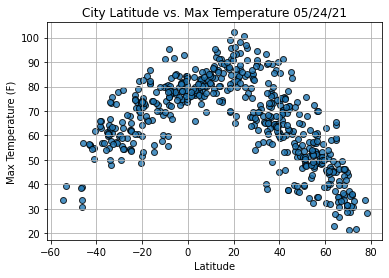

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

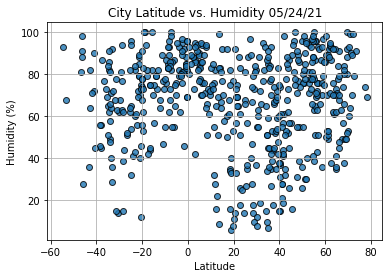

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

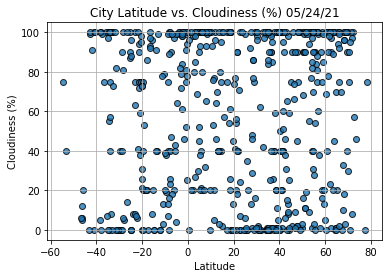

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

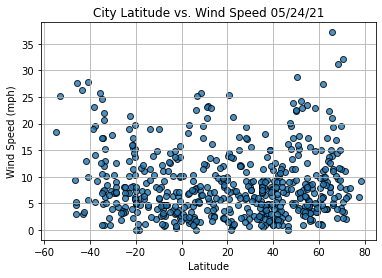

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ribeira Grande,PT,2021-05-24 19:52:50,38.5167,-28.7000,64.80,68,20,14.97
2,Loukhi,RU,2021-05-24 19:56:52,66.0764,33.0381,34.81,91,100,4.70
4,Kumluca,TR,2021-05-24 19:56:52,36.3703,30.2869,77.95,35,1,7.70
6,Port Blair,IN,2021-05-24 19:54:20,11.6667,92.7500,83.34,82,100,23.31
7,Bethel,US,2021-05-24 19:53:12,41.3712,-73.4140,70.56,57,95,1.99


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

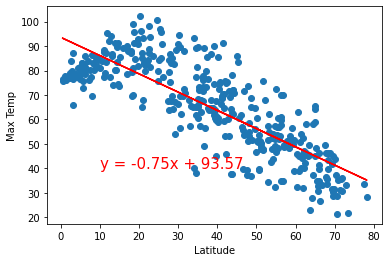

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

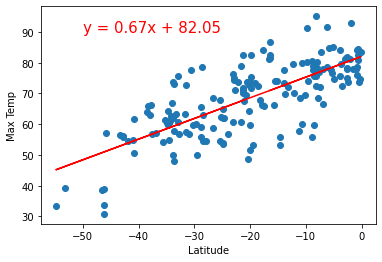

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

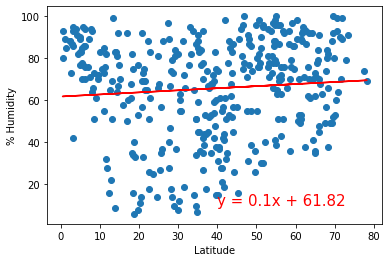

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

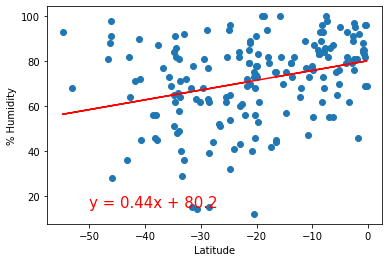

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

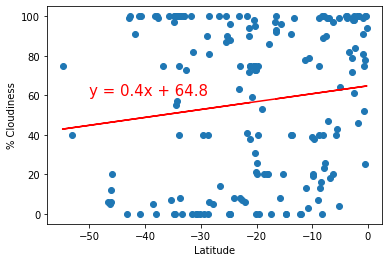

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


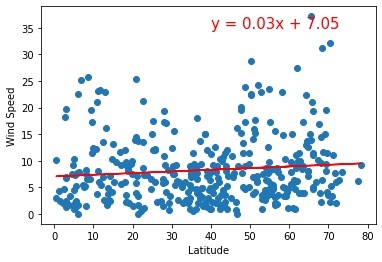

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

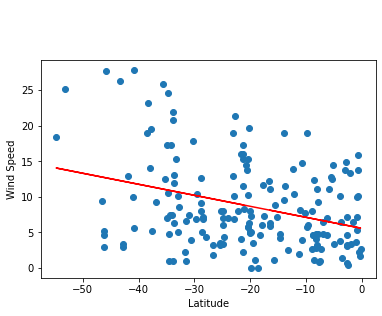

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))